<a href="https://colab.research.google.com/github/MSP24/Grip-Sparks-Internship/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GRIP : The Sparks Foundation

## Data Science and Business Analytics Internship

## Task 3: Exploratory Data Analysis-Retail
Objective: As a Business manager, try to find out the weak areas where you can work to make more profit.

## Author: Manu.S.Pillai

Dataset link: https://bit.ly/3i4rbWl

# Importing libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Reading Data

In [ ]:
# Reading data from local drive
from google.colab import files

files= files.upload()

Saving SampleSuperstore.csv to SampleSuperstore (1).csv


In [ ]:
df= pd.read_csv("SampleSuperstore.csv")
df.head()         # First 5 rows

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
# statistical insights
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
# Dimensions of the given dataframe
df.shape

(9994, 13)

In [ ]:
# Checking for missing values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
# count of unique values
df["Ship Mode"].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [ ]:
df["Segment"].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [ ]:
df["State"].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

In [ ]:
df["Region"].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [ ]:
df["Category"].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [ ]:
df["Sub-Category"].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

## Checking Co-relation

In [ ]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


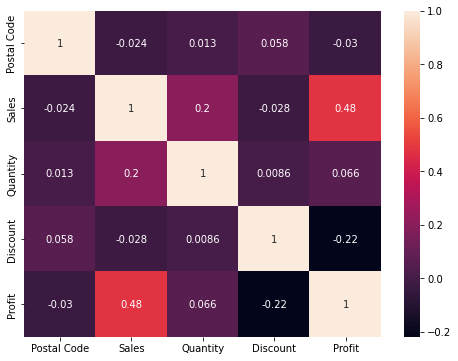

In [ ]:
# Visualizing Co-relation table
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot= True)
plt.show()

Observation:

Here we see that there is positive correlation between Sales & Profit(0.48) means on increasing sale profit increases
& there is negative correlation between Profit & Discount(-0.22) means on increasing discount , profit decreases

# Exploratory Data Analysis

In [ ]:
# State wise profit
total_profit_per_state= df.groupby('State')['Profit'].sum()
total_profit_per_state.head()

State
Alabama        5786.8253
Arizona       -3427.9246
Arkansas       4008.6871
California    76381.3871
Colorado      -6527.8579
Name: Profit, dtype: float64

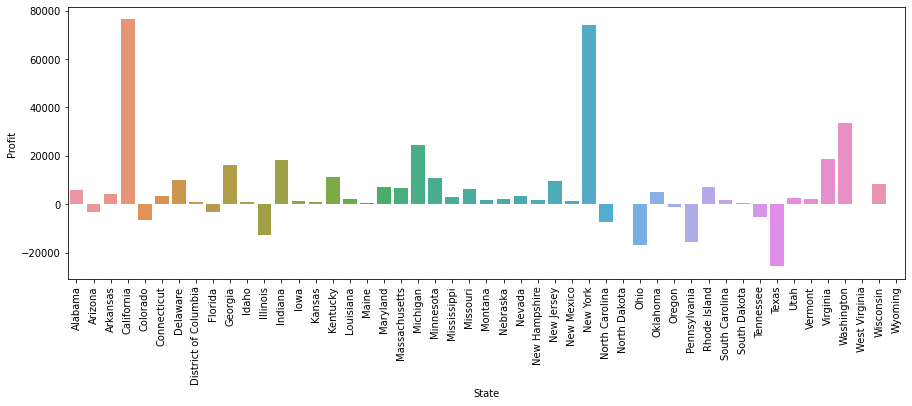

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x= total_profit_per_state.index, y= total_profit_per_state.values)
plt.ylabel("Profit")
plt.xticks(rotation=90)
plt.show()

Observation:

* Top states with maximum profits: California, New York, Washington, Michigan.
* Top states which are at loss: Texas, Ohio, Pennsylvania, Illinois.

In [ ]:
# state wise sales
total_sales_per_state = df.groupby('State')['Sales'].sum()
total_sales_per_state.head()

State
Alabama        19510.6400
Arizona        35282.0010
Arkansas       11678.1300
California    457687.6315
Colorado       32108.1180
Name: Sales, dtype: float64

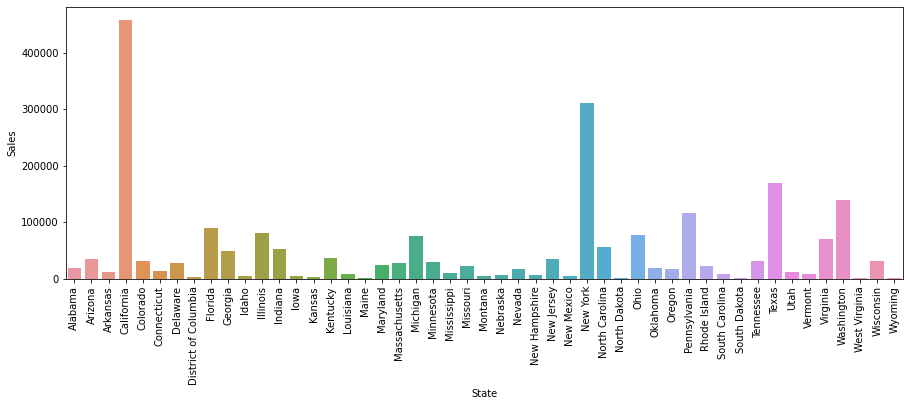

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x= total_sales_per_state.index, y= total_sales_per_state.values)
plt.ylabel("Sales")
plt.xticks(rotation=90)
plt.show()

Observation:

* Top 4 states with highest sale: California, New York, Texas, Washington.
* Top 4 states with lowest sales: South Dakota, Maine, West Virginia, North Dakota.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


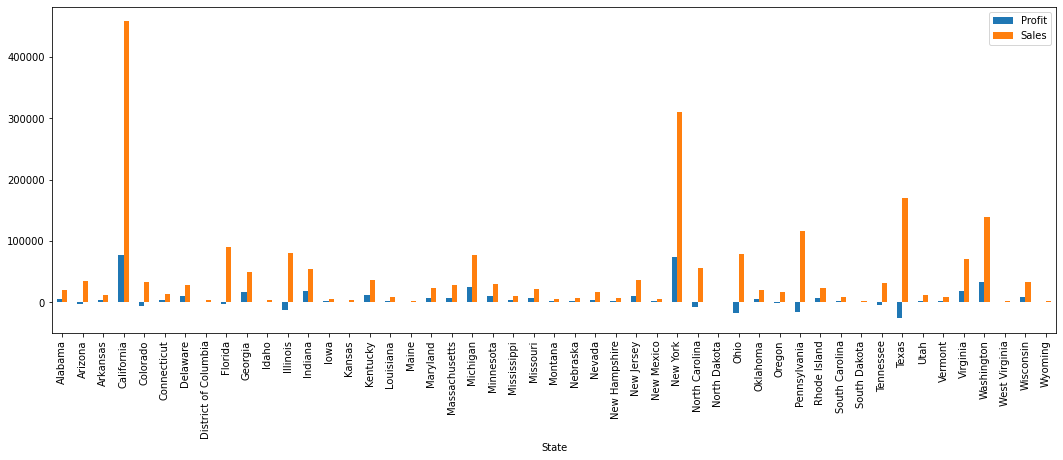

In [ ]:
# Comparing sales and profit state wise
profit_sales = df.groupby("State")["Profit","Sales"].sum()
profit_sales.plot.bar(figsize=(18,6))
plt.show()

Here we found that Texas, Pennsylvania, and Ohio have high sales but negative Profit i.e loss

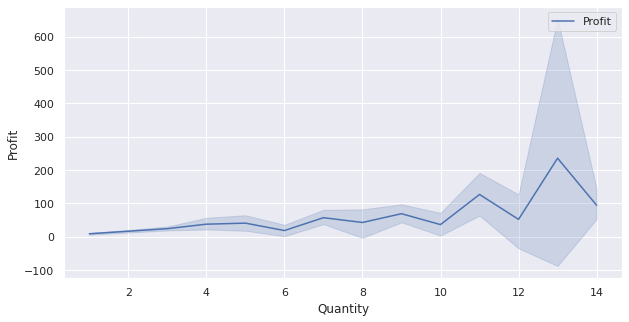

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
sns.lineplot(x="Quantity", y="Profit", data=df, label='Profit')
plt.show()

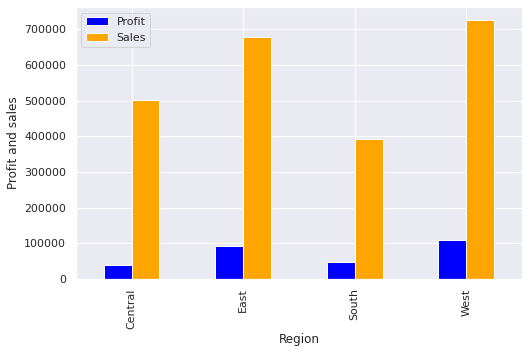

In [ ]:
# Comparing sales and profit Region wise
df.groupby('Region')[['Profit','Sales']].sum().plot.bar(color=['blue','orange'],figsize=(8,5))
plt.ylabel('Profit and sales')
plt.show()

The west region has the highest Profit & sales whereas South region has the lowest.

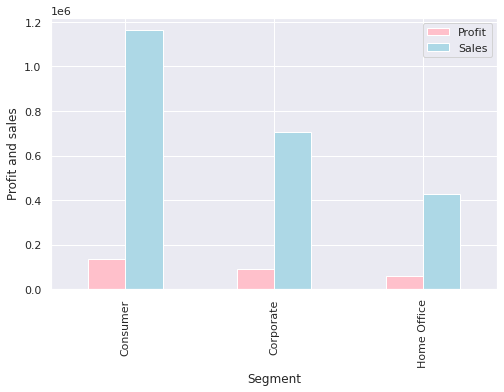

In [ ]:
# Comparing profit and sales Segment wise
df.groupby('Segment')[['Profit','Sales']].sum().plot.bar(color=['pink','lightblue'],figsize=(8,5))
plt.ylabel('Profit and sales')
plt.show()

The Comsumer Segment has the highest Profit & sales whereas Home office has the lowest.

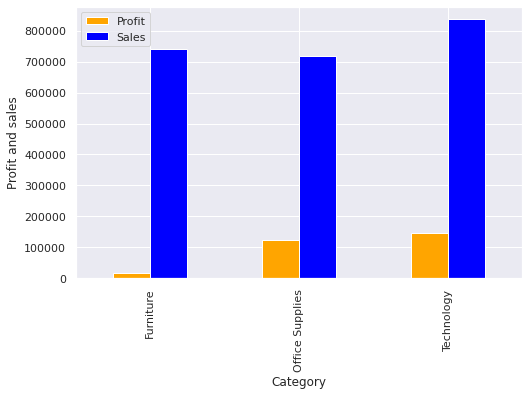

In [ ]:
# Comparing profit and sales category wise
df.groupby('Category')[['Profit','Sales']].sum().plot.bar(color=['orange','blue'],figsize=(8,5))
plt.ylabel('Profit and sales')
plt.show()

Although furniture shows high sales, the profit is comparatively very less.

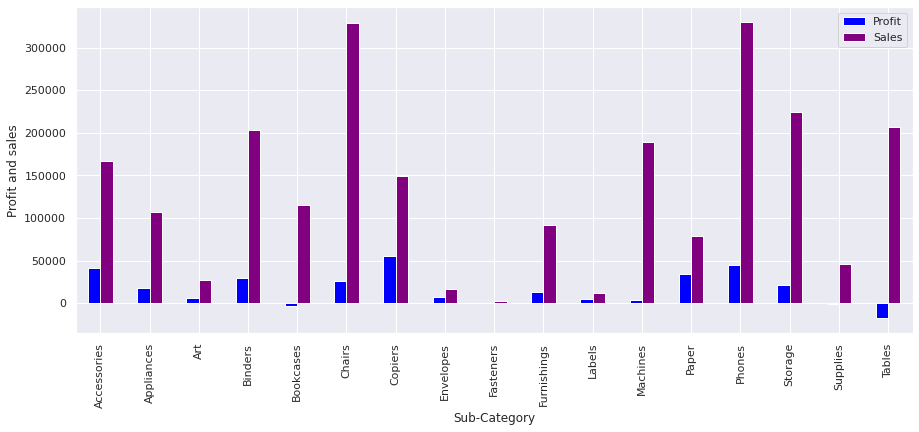

In [ ]:
# Comparing profit and sales Sub-category wise
df.groupby('Sub-Category')[['Profit','Sales']].sum().plot.bar(color=['blue','purple'],figsize=(15,6))
plt.ylabel('Profit and sales')
plt.show()

Notice Tables with high sales but Net loss.

In [ ]:
# Analyzing Category wise sales, Discount, Profit:
category = df.groupby(['Category'])[['Sales', 'Discount', 'Profit']].mean()
category

,Sales,Discount,Profit
Category,,,
Furniture,349.834887,0.173923,8.699327
Office Supplies,119.324101,0.157285,20.327050
Technology,452.709276,0.132323,78.752002


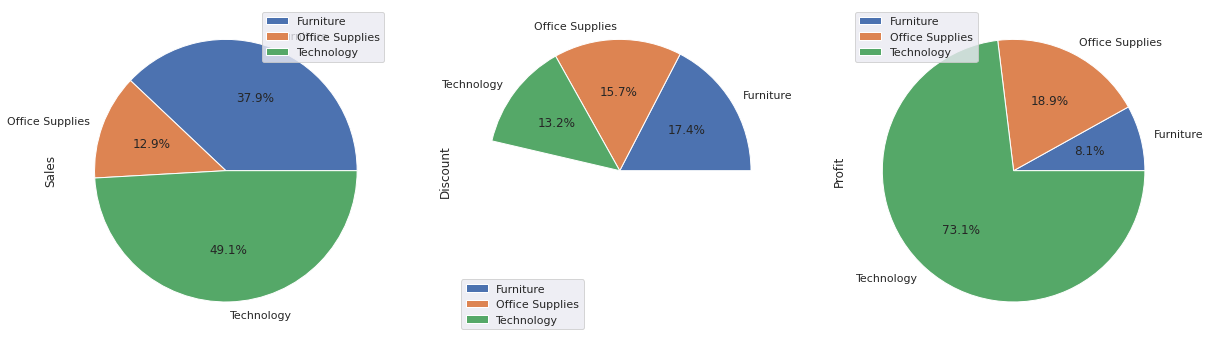

In [ ]:
# Pie Charts of Category wise sales, Discount, Profit
category.plot.pie(subplots=True, figsize=(20, 18),autopct='%0.1f%%', labels = category.index)
plt.show()

Observation:

1. Technology Category has the maximum Sales and Profit.

2. Office Supplies category has minimum sales and Furniture category has lowest Profit.

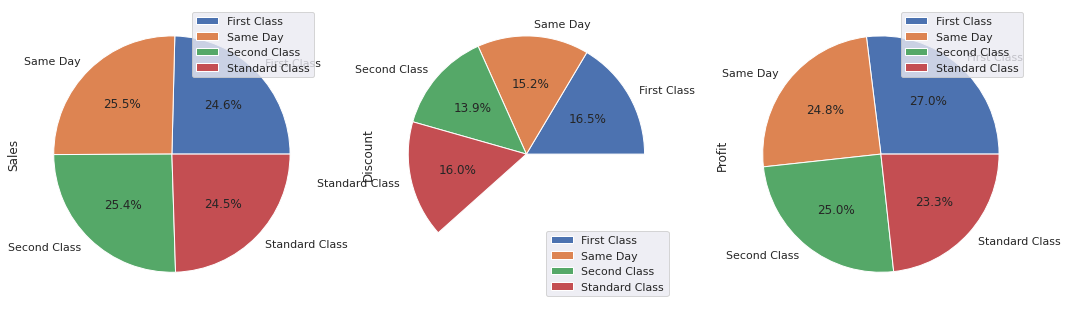

In [ ]:
# Analyzing Ship Mode wise sales, Discount, Profit
shipmode = df.groupby(['Ship Mode'])[['Sales', 'Discount', 'Profit']].mean()
shipmode.plot.pie(subplots=True,figsize=(18, 20), autopct='%0.1f%%', labels = shipmode.index)
plt.show()

Observation:
* Same Day Ship Mode has the highest sales.
* First Class Ship mode has the highest Profit and Discount.


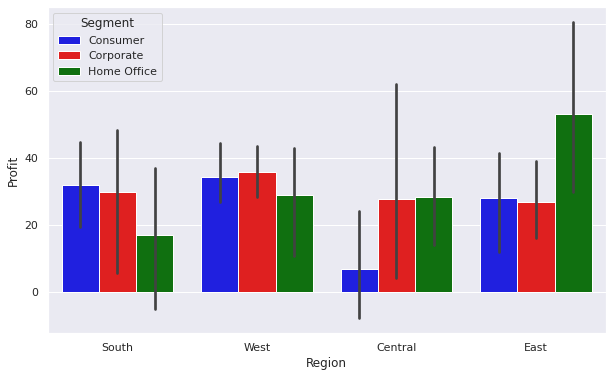

In [ ]:
# Distrubution of Profits of Segment across diffrent regions
plt.figure(figsize = (10,6))
sns.barplot(data = df , x = "Region",y = "Profit" ,hue = "Segment", palette=['blue','red','green'])
plt.show()

Observation: Highest profits for each region are as follows:
* South= Consumer Segment
* West= Corporate Segment
* Central= Home Office Segment
* East= Home Office Segment

Lowest profits for each region are as follows:
* South= Home Office Segment
* West= Home Office Segment
* Central= Consumer Segment
* East= Corporate Segment

-------------------------------------------------------------------------------------------------

## Conclusion

* Top profit giving states: **California, New York , Washington and Michigan**. We can increase sales in these states for increasing profit.

* Top states in loss: **Illinois, Pennsylvania, Ohio and Texas**. We have to pay attention to these states for reducing the loss and making these states on a positive cash flow.

* **Texas, Pennsylvania, and Ohio** have high Sales but negative Profit i.e. loss. This is becuse of the high discounts given to customer. We need to decrease discount percentage at **Texas, Pennsylvania, and Ohio**.

* Illinois has the highest Avg_discount_percent among the states of USA but profit and sales are low here. So we can reduce discount % in Illinois.

* Same Day Ship Mode has the highest sales and First Class Ship mode has the highest Profit and Discount. So, we have to use Same Day Ship Mode and First Class Ship in greater frequency.

* Standard Class Ship mode has lowest sales and lowest profit. So, We can avoid this ship mode.

* Among Sub-Category items, **Copiers and machines** have the highest Sales in united States. In above two graph we see that Machines had second highest sale but due to large discount it has less profit.

---